# Parameter Space Validation
This notebook visualizes the parameter space for large parameter sampling.

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import kstest

## Load Parameter Samples Text File

In [2]:
PARAM_FILE = Path("/Users/robertxpearce/Desktop/reionization-emulator/data/param_samples/params_test.txt")

names = ["zmean", "alpha", "kb", "b0"]
bounds = {
    "zmean": (7.0, 9.0),
    "alpha": (0.10, 0.90),
    "kb":    (0.10, 2.0),
    "b0":    (0.10, 0.80),
}

X = np.loadtxt(PARAM_FILE)
df = pd.DataFrame(X, columns=names)

df.head()

,zmean,alpha,kb,b0
0,7.351314,0.709365,1.399123,0.679806
1,7.580285,0.250324,0.365075,0.171167
2,8.691099,0.848648,0.562616,0.360053
3,8.564195,0.403749,1.978316,0.408692
4,8.155008,0.471118,1.226231,0.628948


## Check Shape and Min/Max for Each Param

In [3]:
print("Shape:", df.shape)

for n in names:
    lo, hi = bounds[n]
    mn, mx = df[n].min(), df[n].max()
    print(f"{n:5s} \t min={mn:.17g} \t max={mx:.17g} \t bounds=[{lo},{hi}] in_bounds={mn>=lo and mx<=hi}")

Shape: (5, 4)
zmean 	 min=7.3513137773495592 	 max=8.6910987757043507 	 bounds=[7.0,9.0] in_bounds=True
alpha 	 min=0.25032356115328347 	 max=0.84864847248896857 	 bounds=[0.1,0.9] in_bounds=True
kb    	 min=0.36507477214783723 	 max=1.9783155484048252 	 bounds=[0.1,2.0] in_bounds=True
b0    	 min=0.17116671337328559 	 max=0.67980568667147034 	 bounds=[0.1,0.8] in_bounds=True


## Histogram of Parameter Space
- Histograms should be flat for uniform coverage.

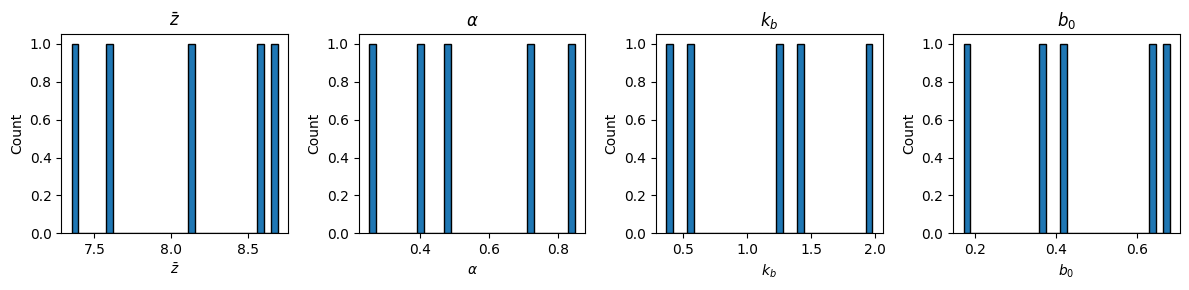

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))

columns = ["zmean", "alpha", "kb", "b0"]
labels  = [r"$\bar{z}$", r"$\alpha$", r"$k_b$", r"$b_0$"]

for i, (col, label) in enumerate(zip(columns, labels), start=1):
    plt.subplot(1, 4, i)
    plt.hist(df[col], bins=30, edgecolor="black") # Bins proportional sqrt(n)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Pairwise Coverage
Shows the space-filling behavior checking for visible correlations or clustering.

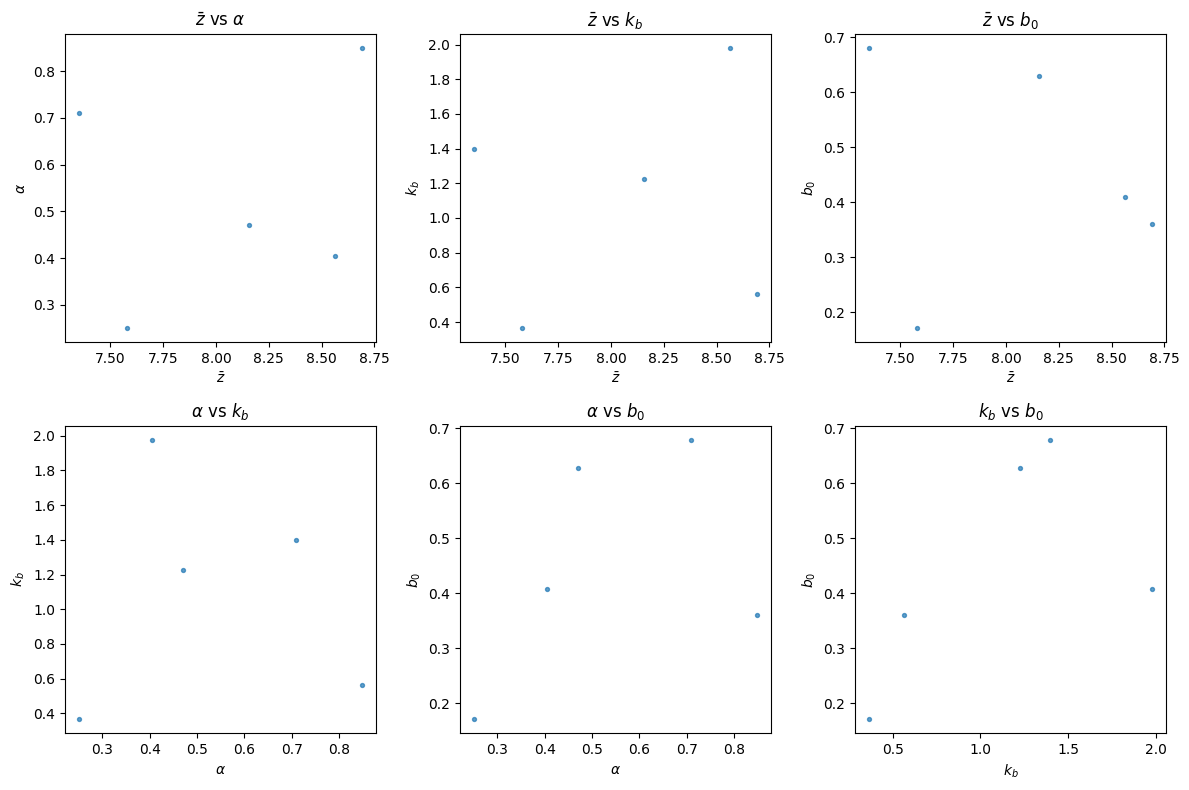

In [5]:
pairs = list(combinations(columns, 2))
pair_labels = list(combinations(labels, 2))

plt.figure(figsize=(12, 8))

for i, ((xcol, ycol), (xlabel, ylabel)) in enumerate(zip(pairs, pair_labels), start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df[xcol], df[ycol], s=8, alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")

plt.tight_layout()
plt.show()

## Marginal Uniformity (Kolmogorov-Smirnov Test)  
* D: The maximum absolute difference between the empirical CDF and the CDF of the uniform distribution.
* Large p-value: Consistent with Uniform
* Small p-value: Marginal Bias

In [6]:
for n in names:
    lo, hi = bounds[n]
    u = (df[n] - lo) / (hi - lo)
    D, p = kstest(u, "uniform")
    print(f"{n:5s} KS D={D:.4f} p={p:.3f}")

zmean KS D=0.1821 p=0.986
alpha KS D=0.1879 p=0.980
kb    KS D=0.1928 p=0.974
b0    KS D=0.1717 p=0.993


## Pairwise Correlation

In [7]:
print("Pearson:\n", df[columns].corr(method="pearson"))
print()
print("Spearman:\n", df[columns].corr(method="spearman"))

Pearson:
           zmean     alpha        kb        b0
zmean  1.000000  0.244265  0.166054 -0.182976
alpha  0.244265  1.000000 -0.048695  0.427002
kb     0.166054 -0.048695  1.000000  0.568618
b0    -0.182976  0.427002  0.568618  1.000000

Spearman:
        zmean  alpha   kb   b0
zmean    1.0    0.3  0.0 -0.4
alpha    0.3    1.0  0.1  0.4
kb       0.0    0.1  1.0  0.7
b0      -0.4    0.4  0.7  1.0
